# HOUSE PRICE PREDICTION

- In this project we are traning a model on California Housing Dataset.

In [4]:
# First of all we will import all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

In [10]:
# Now we will save the data into dataframe
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

In [11]:
# Taking a bird eye view on the data
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Performing EDA

In [ ]:
# Getting the description of the data
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [14]:
# Checking the data types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [16]:
# Checking if there is any null values
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

- There is no missing values in the data so we are good to go

In [17]:
# Checking the shape of the data
df.shape

(20640, 9)

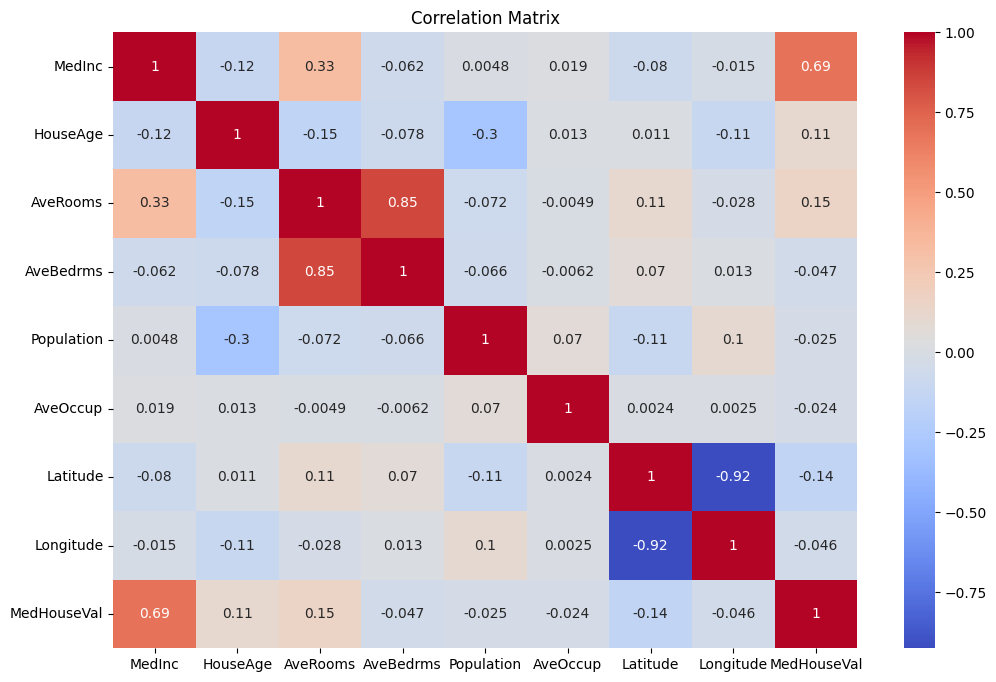

In [22]:
# Creating a heatmap of the data
plt.figure(figsize=(12,8))
sns.heatmap(df.corr() , annot = True , cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [23]:
# Performing Train Test Split and seprationg target columsn
X = df.drop('MedHouseVal' , axis = 1)
y = df['MedHouseVal']

In [25]:
# Performing Train Test split on the data
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 42 , test_size = 0.2)

In [28]:
# Now we will train regression models

# Linear Regression

lr = LinearRegression()
lr.fit(X_train , y_train)
pred_lr = lr.predict(X_test)
print(f'R2 score of Linear Regression is: {r2_score(y_test , pred_lr)}')
print(f'Mean Square Error of Linear Regression is: {mean_squared_error(y_test , pred_lr)}')

R2 score of Linear Regression is: 0.5757877060324511
Mean Square Error of Linear Regression is: 0.555891598695244


In [30]:
# Decision Tree Regression

dtr = DecisionTreeRegressor()
dtr.fit(X_train , y_train)
pred_dtr = dtr.predict(X_test)
print(f'R2 score of Decision Tree Regression is: {r2_score(y_test , pred_dtr)}')
print(f'Mean Square Error of Decision Tree Regression is: {mean_squared_error(y_test , pred_dtr)}')

R2 score of Decision Tree Regression is: 0.617404533500213
Mean Square Error of Decision Tree Regression is: 0.5013565343355862


In [31]:
# Random Forest Regressor

rfr = RandomForestRegressor()
rfr.fit(X_train , y_train)
pred_rfr = rfr.predict(X_test)
print(f'R2 score of Random Forest Regressor is: {r2_score(y_test , pred_rfr)}')
print(f'Mean Square Error of Random Forest Regressor is: {mean_squared_error(y_test , pred_rfr)}')

R2 score of Random Forest Regressor is: 0.804635658982765
Mean Square Error of Random Forest Regressor is: 0.2560071864971015
